In [176]:
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.offline as po
import plotly.graph_objs as go

In [177]:
! pip install openpyxl
! pip install plotly

In [178]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [179]:
data = pd.read_excel("/Users/rufen/Downloads/data_project4_meta/SamplePaymentData.xlsx")
data.head()

,ResidentID,ResidentName,PaymentType,PaymentStatus,AccountNumber,BillNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,credit card和due fee的关系,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,13956,Payer 13956,Bank Account,Approved,69571-40018,21443,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate,Row Labels,Count of PaymentType,Sum of TotalFee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3390,Payer 3390,Bank Account,Approved,69925-1031620,90861,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate,Bank Account,18752,2283.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9900,Payer 9900,Bank Account,Approved,69604-77909,158,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property,Credit Card - American Express,1097,10908.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12722,Payer 12722,Bank Account,Approved,69925-1033253,2826,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,Credit Card - Discover,242,1994.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18116,Payer 18116,Bank Account,Approved,69934-1074280,69404,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,Credit Card - MasterCard,2236,13210.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
data.shape

(24404, 29)

In [181]:
data.columns

Index(['ResidentID', 'ResidentName', 'PaymentType', 'PaymentStatus', 'AccountNumber', 'BillNumber', 'SubmittedDate', 'TotalDue', 'TotalPaid', 'TotalFee', 'BankName', 'ScheduledPaymentDate', 'State', 'BillerName', 'BillType', 'credit card和due fee的关系', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'], dtype='object')

In [182]:
columns=['credit card和due fee的关系', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28']

In [183]:
data = data.drop(columns=columns,axis=1)

In [184]:
data.shape

(24404, 15)

In [185]:
data.head()

,ResidentID,ResidentName,PaymentType,PaymentStatus,AccountNumber,BillNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType
0,13956,Payer 13956,Bank Account,Approved,69571-40018,21443,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate
1,3390,Payer 3390,Bank Account,Approved,69925-1031620,90861,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate
2,9900,Payer 9900,Bank Account,Approved,69604-77909,158,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property
3,12722,Payer 12722,Bank Account,Approved,69925-1033253,2826,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate
4,18116,Payer 18116,Bank Account,Approved,69934-1074280,69404,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate


### For "ResidentName","BillNumber", "residentid" and "accountnumber" these for columns, I have check thesse columns, two 'resident' are same, i will keep residentid and accountnumber.

In [186]:
column2=["ResidentName","BillNumber"]

In [187]:
data.drop(columns=column2, inplace=True)

In [188]:
data.shape

(24404, 13)

In [189]:
data.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType
0,13956,Bank Account,Approved,69571-40018,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate
1,3390,Bank Account,Approved,69925-1031620,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate
2,9900,Bank Account,Approved,69604-77909,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property
3,12722,Bank Account,Approved,69925-1033253,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate
4,18116,Bank Account,Approved,69934-1074280,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate


### Figure out the period of this dataset. the submitted and the scheduled date have big gap and all are recorded within one year.

In [190]:
print(f'the last day of submitted day of this dataset:{data["SubmittedDate"].max()}')
print(f'the first day of submitted day of this dataset:{data["SubmittedDate"].min()}')
print(f'the last day of scheduled day of this dataset:{data["ScheduledPaymentDate"].max()}')
print(f'the first day of scheduled day of this dataset:{data["ScheduledPaymentDate"].min()}')

the last day of submitted day of this dataset:2020-12-31 23:45:00
the first day of submitted day of this dataset:2020-01-07 16:29:00
the last day of scheduled day of this dataset:2020-12-31 22:25:06
the first day of scheduled day of this dataset:2020-11-01 00:00:00


# EDA
## First, i will find all the due account, and then based on that number to get deeper analysis. 

In [191]:
data['dueday'] = data['ScheduledPaymentDate'] - data['SubmittedDate']
data.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,dueday
0,13956,Bank Account,Approved,69571-40018,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate,27 days 03:17:00
1,3390,Bank Account,Approved,69925-1031620,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate,6 days 15:58:00
2,9900,Bank Account,Approved,69604-77909,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property,23 days 08:17:00
3,12722,Bank Account,Approved,69925-1033253,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,5 days 12:01:00
4,18116,Bank Account,Approved,69934-1074280,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,4 days 17:15:00


In [192]:
data[['due','col1','col2']]=data['dueday'].astype(str).str.split(' ',expand=True)  # pay attention that there are two square bracket
data.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,dueday,due,col1,col2
0,13956,Bank Account,Approved,69571-40018,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate,27 days 03:17:00,27,days,03:17:00
1,3390,Bank Account,Approved,69925-1031620,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate,6 days 15:58:00,6,days,15:58:00
2,9900,Bank Account,Approved,69604-77909,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property,23 days 08:17:00,23,days,08:17:00
3,12722,Bank Account,Approved,69925-1033253,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,5 days 12:01:00,5,days,12:01:00
4,18116,Bank Account,Approved,69934-1074280,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,4 days 17:15:00,4,days,17:15:00


In [193]:
columns=['dueday','col1','col2']
data=data.drop(columns=columns)

In [194]:
data['Due[y/n]']=data['due'].astype(int).apply(lambda x: 'y' if x < 0 else 'n')

The due accounts occupy 75.77% of all the accounts.


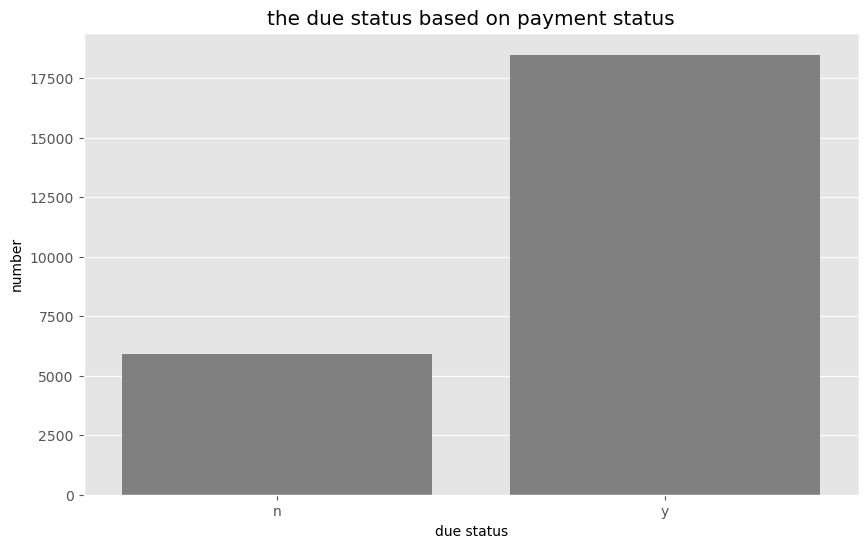

In [195]:
plt.figure(figsize=(10,6))
plt.title("the due status based on payment status")
sns.countplot(data=data, x='Due[y/n]',color='#808080')
plt.xlabel("due status")
plt.ylabel("number")

due_y_count = data[data['Due[y/n]'] == 'y'].shape[0]
total_accounts = data.shape[0]
due_y_percentage = (due_y_count / total_accounts) * 100

print(f"The due accounts occupy {due_y_percentage:.2f}% of all the accounts.")

### More detailed paymentstatus

In [196]:
data['PaymentStatus'].value_counts()

Approved     23962
Failed         348
Cancelled       91
Scheduled        3
Name: PaymentStatus, dtype: int64

In [197]:
data_failed=data[data['PaymentStatus']=='Failed']
data_failed.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n]
49,848,Bank Account,Failed,70158-404017,2020-12-01 07:11:00,2876.12,2876.12,0.35,BANK OF AMERICA N.A.,2020-12-01 00:00:00,AZ,City of 210,Real Estate,-1,y
54,17077,Bank Account,Failed,70287-150854,2020-12-26 02:07:43,3430.75,3430.75,0.00,BELMONT SAVINGS BANK,2020-12-27 00:00:43,LA,Town of 39,Real Estate,0,n
140,14259,Credit Card - MasterCard,Failed,69669-441416,2020-11-02 10:32:35,132.29,132.29,4.94,Credit Card - MasterCard,2020-11-02 00:00:00,LA,Town of 25,MotorVehicle-Trailer,-1,y
159,15084,Bank Account,Failed,69766-443654,2020-11-03 08:16:00,321.88,321.88,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-03 00:00:00,LA,City of 2,MotorVehicle-Trailer,-1,y
202,3960,Credit Card - VISA,Failed,69763-441993,2020-11-04 22:49:35,23.44,23.44,1.57,Credit Card - Visa,2020-11-04 22:45:24,LA,City of 36,MotorVehicle-Trailer,-1,y


In [198]:
data_failed.dtypes

ResidentID                       int64
PaymentType                     object
PaymentStatus                   object
AccountNumber                   object
SubmittedDate           datetime64[ns]
TotalDue                       float64
TotalPaid                      float64
TotalFee                       float64
BankName                        object
ScheduledPaymentDate    datetime64[ns]
State                           object
BillerName                      object
BillType                        object
due                             object
Due[y/n]                        object
dtype: object

In [199]:
data_failed['dueday'] = data_failed['ScheduledPaymentDate'] - data_failed['SubmittedDate']
data_failed[['dueday']].head(5)

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_10700/2248736187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dueday
49,-1 days +16:49:00
54,0 days 21:53:00
140,-1 days +13:27:25
159,-1 days +15:44:00
202,-1 days +23:55:49


### i want to get a new column to show the due status, but my methos is quite awkward, i'm trying to get a better method later.

In [200]:
data_failed[['due','col1','col2']]=data_failed['dueday'].astype(str).str.split(' ',expand=True)
data_failed.head()

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_10700/1986471895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_10700/1986471895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_10700/1986471895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n],dueday,col1,col2
49,848,Bank Account,Failed,70158-404017,2020-12-01 07:11:00,2876.12,2876.12,0.35,BANK OF AMERICA N.A.,2020-12-01 00:00:00,AZ,City of 210,Real Estate,-1,y,-1 days +16:49:00,days,+16:49:00
54,17077,Bank Account,Failed,70287-150854,2020-12-26 02:07:43,3430.75,3430.75,0.00,BELMONT SAVINGS BANK,2020-12-27 00:00:43,LA,Town of 39,Real Estate,0,n,0 days 21:53:00,days,21:53:00
140,14259,Credit Card - MasterCard,Failed,69669-441416,2020-11-02 10:32:35,132.29,132.29,4.94,Credit Card - MasterCard,2020-11-02 00:00:00,LA,Town of 25,MotorVehicle-Trailer,-1,y,-1 days +13:27:25,days,+13:27:25
159,15084,Bank Account,Failed,69766-443654,2020-11-03 08:16:00,321.88,321.88,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-03 00:00:00,LA,City of 2,MotorVehicle-Trailer,-1,y,-1 days +15:44:00,days,+15:44:00
202,3960,Credit Card - VISA,Failed,69763-441993,2020-11-04 22:49:35,23.44,23.44,1.57,Credit Card - Visa,2020-11-04 22:45:24,LA,City of 36,MotorVehicle-Trailer,-1,y,-1 days +23:55:49,days,+23:55:49


### So now i can drop the other unrelevant columns to remain only 'due' column

In [201]:
columns3=['dueday','col1','col2']
data_failed=data_failed.drop(columns=columns3)
data_failed.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n]
49,848,Bank Account,Failed,70158-404017,2020-12-01 07:11:00,2876.12,2876.12,0.35,BANK OF AMERICA N.A.,2020-12-01 00:00:00,AZ,City of 210,Real Estate,-1,y
54,17077,Bank Account,Failed,70287-150854,2020-12-26 02:07:43,3430.75,3430.75,0.00,BELMONT SAVINGS BANK,2020-12-27 00:00:43,LA,Town of 39,Real Estate,0,n
140,14259,Credit Card - MasterCard,Failed,69669-441416,2020-11-02 10:32:35,132.29,132.29,4.94,Credit Card - MasterCard,2020-11-02 00:00:00,LA,Town of 25,MotorVehicle-Trailer,-1,y
159,15084,Bank Account,Failed,69766-443654,2020-11-03 08:16:00,321.88,321.88,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-03 00:00:00,LA,City of 2,MotorVehicle-Trailer,-1,y
202,3960,Credit Card - VISA,Failed,69763-441993,2020-11-04 22:49:35,23.44,23.44,1.57,Credit Card - Visa,2020-11-04 22:45:24,LA,City of 36,MotorVehicle-Trailer,-1,y


In [202]:
data_failed['due'].astype(int).value_counts()

-1     306
 0      20
 28      3
 34      2
 22      2
 26      2
 36      1
 18      1
 27      1
 21      1
 24      1
 2       1
 47      1
 17      1
 20      1
 29      1
 16      1
 37      1
 25      1
Name: due, dtype: int64

In [203]:
data_failed['Due[y/n]']=data_failed['due'].astype(int).apply(lambda x: 'y' if x < 0 else 'n')
data_failed.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n]
49,848,Bank Account,Failed,70158-404017,2020-12-01 07:11:00,2876.12,2876.12,0.35,BANK OF AMERICA N.A.,2020-12-01 00:00:00,AZ,City of 210,Real Estate,-1,y
54,17077,Bank Account,Failed,70287-150854,2020-12-26 02:07:43,3430.75,3430.75,0.00,BELMONT SAVINGS BANK,2020-12-27 00:00:43,LA,Town of 39,Real Estate,0,n
140,14259,Credit Card - MasterCard,Failed,69669-441416,2020-11-02 10:32:35,132.29,132.29,4.94,Credit Card - MasterCard,2020-11-02 00:00:00,LA,Town of 25,MotorVehicle-Trailer,-1,y
159,15084,Bank Account,Failed,69766-443654,2020-11-03 08:16:00,321.88,321.88,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-03 00:00:00,LA,City of 2,MotorVehicle-Trailer,-1,y
202,3960,Credit Card - VISA,Failed,69763-441993,2020-11-04 22:49:35,23.44,23.44,1.57,Credit Card - Visa,2020-11-04 22:45:24,LA,City of 36,MotorVehicle-Trailer,-1,y


The due accounts occupy 87.93% of all failed accounts.


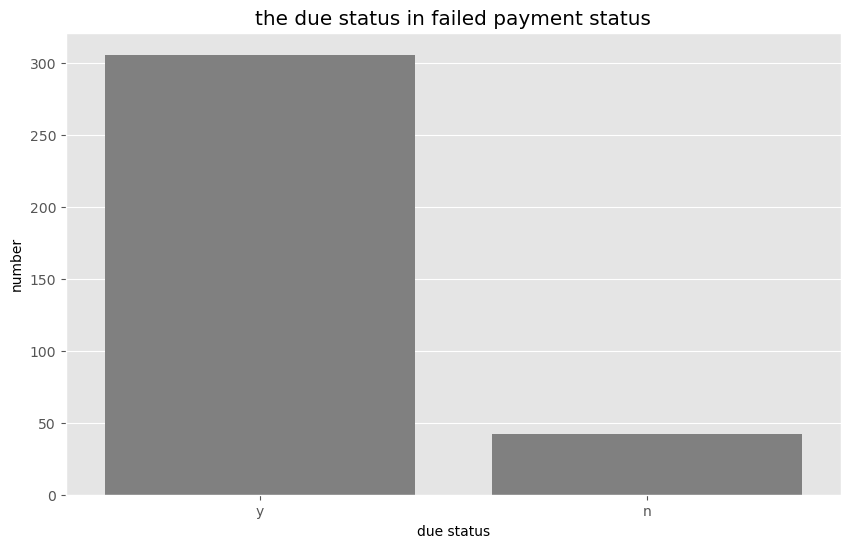

In [204]:
plt.figure(figsize=(10,6))
plt.title("the due status in failed payment status")
sns.countplot(data=data_failed, x='Due[y/n]',color='#808080')
plt.xlabel("due status")
plt.ylabel("number")

due_y_count = data_failed[data_failed['Due[y/n]'] == 'y'].shape[0]
total_accounts = data_failed.shape[0]
due_y_percentage = (due_y_count / total_accounts) * 100

print(f"The due accounts occupy {due_y_percentage:.2f}% of all failed accounts.")

### we can see the due account in paymnet failed category accupy estimately 88%, the hightest rate.

## Second, i try to analyze fee column, and try to find some insight

In [205]:
data.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n]
0,13956,Bank Account,Approved,69571-40018,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate,27,n
1,3390,Bank Account,Approved,69925-1031620,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate,6,n
2,9900,Bank Account,Approved,69604-77909,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property,23,n
3,12722,Bank Account,Approved,69925-1033253,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,5,n
4,18116,Bank Account,Approved,69934-1074280,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,4,n


### the relationship between fee and paymnet type 

In [206]:
data['PaymentType'].value_counts()

Bank Account                      18752
Credit Card - MasterCard           2236
Credit Card - VISA                 2077
Credit Card - American Express     1097
Credit Card - Discover              242
Name: PaymentType, dtype: int64

In [207]:
data_typefee=data.groupby(['PaymentType'])['TotalFee'].mean().sort_values(ascending = False)
data_typefee

PaymentType
Credit Card - American Express    9.943911
Credit Card - Discover            8.240496
Credit Card - MasterCard          5.908220
Credit Card - VISA                4.861666
Bank Account                      0.121768
Name: TotalFee, dtype: float64

<Axes: title={'center': 'the charged fee among different payment types'}, xlabel='PaymentType'>

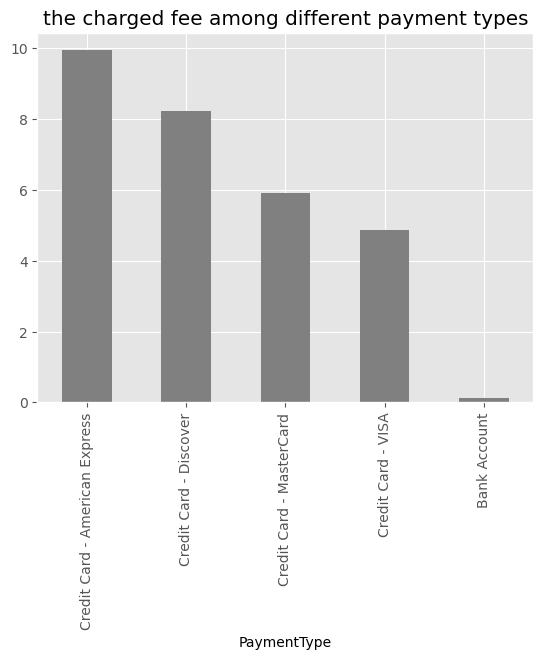

In [208]:
plt.title("the charged fee among different payment types")
data_typefee.plot(kind='bar',color='#808080')

### we find that the AE credit card charged the most fee, and bank account the least.
### Then we try to find the relationship between fee and billtype 

In [209]:
data['BillType'].value_counts()

Water-Sewer                          14085
Real Estate                           2440
Water                                 2407
Parking                               2259
MotorVehicle-Trailer                  1263
Web Service - Permits                  430
Water-Sewer-Trash                      322
Miscellaneous                          309
Birth Record                           218
Mercantile Invoice                     167
Personal Property                      152
Dog Licenses - Renewal                  76
Athletic Fee                            58
Construction - Code Enforcement         56
Death Record                            38
Transfer Station Stickers               31
Marriage Record                         31
Web Service - Pet Renewal License       16
Boat                                    13
Dog Licenses - New                       9
Permit                                   8
Full Day Kindergarten Tuition            7
Updated RE                               6
Pre-School 

In [210]:
#this is about billtype and due account 
data.groupby(['BillType'])['Due[y/n]'].value_counts()

BillType                           Due[y/n]
Athletic Fee                       y              58
Birth Record                       y             218
Boat                               y              13
Construction - Code Enforcement    y              56
Death Record                       y              38
Dog Licenses - New                 y               9
Dog Licenses - Renewal             y              75
                                   n               1
Full Day Kindergarten Tuition      y               7
Marriage Record                    y              31
Mercantile Invoice                 y             159
                                   n               8
Miscellaneous                      y             309
MotorVehicle-Trailer               y            1179
                                   n              84
Parking                            y            2253
                                   n               6
Parking/Shellfish Permit           y               1
Pe

### we see nearly all types of spending have due accounts, except web-service for permits and pet license.

Text(0.5, 1.0, 'the due status for bill type')

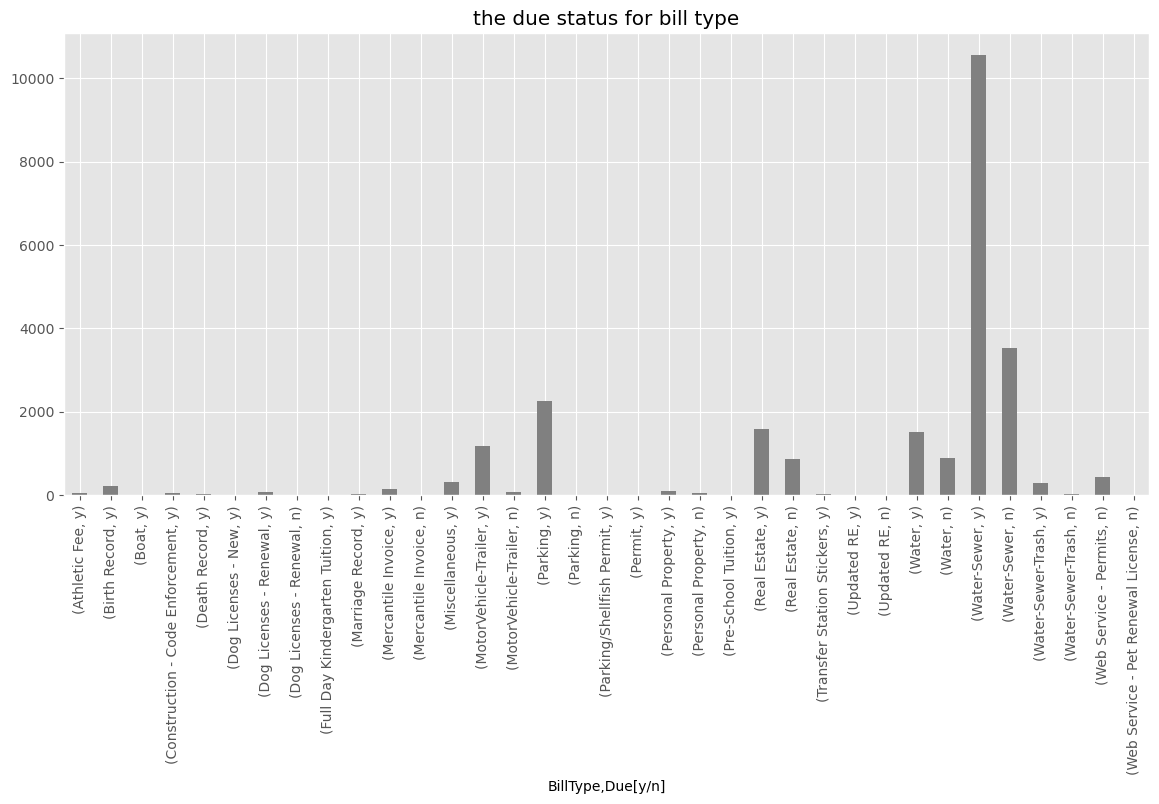

In [211]:
plt.figure(figsize=(14,6))
data.groupby(['BillType'])['Due[y/n]'].value_counts().plot(kind='bar', color=('#808080'))
plt.title("the due status for bill type")

In [212]:
#this is about billtype and fee
data_billtypefee=data.groupby(['BillType'])['TotalFee'].mean().sort_values(ascending=False)
data_billtypefee

BillType
Full Day Kindergarten Tuition        13.578571
Construction - Code Enforcement       6.458571
Real Estate                           5.625652
Athletic Fee                          4.702069
Web Service - Permits                 3.742907
Permit                                3.558750
Web Service - Pet Renewal License     2.911875
Transfer Station Stickers             1.630323
Miscellaneous                         1.591327
MotorVehicle-Trailer                  1.590285
Death Record                          1.258684
Parking                               1.232421
Birth Record                          1.164312
Parking/Shellfish Permit              1.160000
Water-Sewer-Trash                     1.098820
Boat                                  1.089231
Mercantile Invoice                    1.006467
Water-Sewer                           0.980490
Water                                 0.936967
Marriage Record                       0.931290
Dog Licenses - New                    0.818889
Dog 

<Axes: title={'center': 'the charged fee among different bill types'}, xlabel='BillType'>

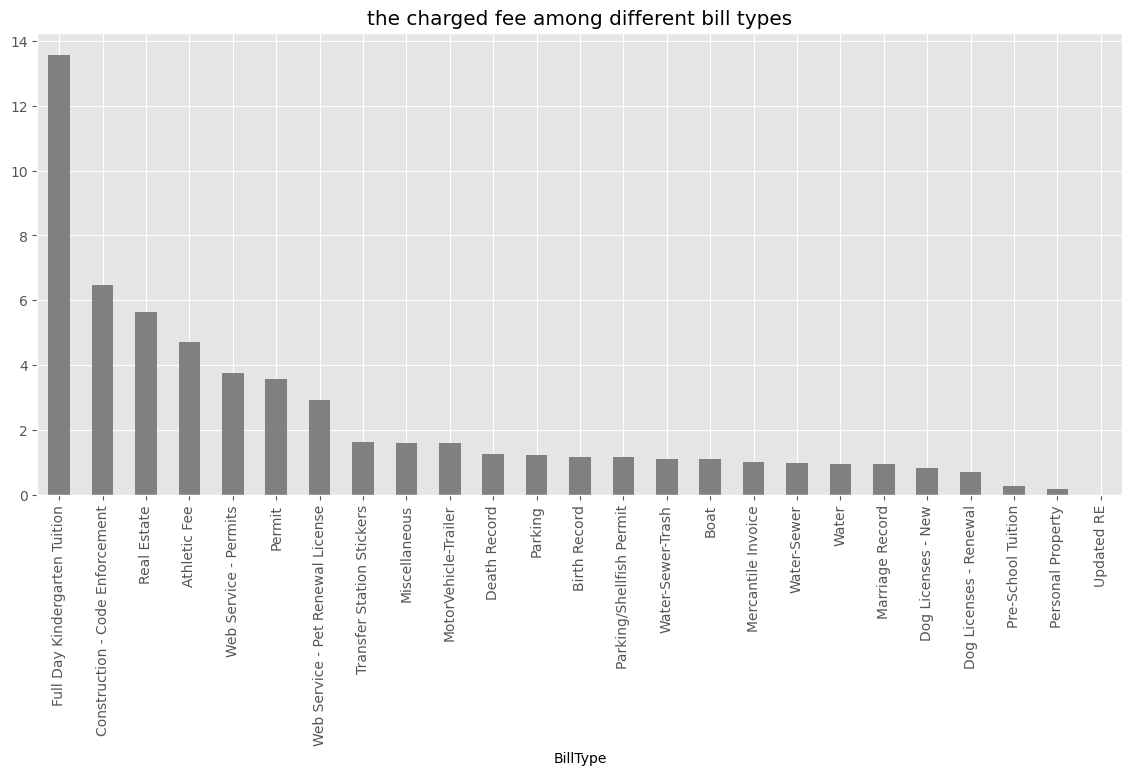

In [213]:
plt.figure(figsize=(14,6))
plt.title("the charged fee among different bill types")
data_billtypefee.plot(kind='bar',color='#808080')

## We then try to analyze state column

In [214]:
data['State'].value_counts()

LA    15933
AZ     5068
IL     2333
WA     1033
OH       37
Name: State, dtype: int64

In [215]:
data.groupby(['State'])['Due[y/n]'].value_counts()

State  Due[y/n]
AZ     y            4032
       n            1036
IL     y            2308
       n              25
LA     y           11210
       n            4723
OH     y              33
       n               4
WA     y             907
       n             126
Name: Due[y/n], dtype: int64

In [217]:
data.groupby(['State'])['TotalFee'].mean()

State
AZ     2.681279
IL     1.439653
LA     1.180311
OH    10.117568
WA     2.291239
Name: TotalFee, dtype: float64

In [218]:
data.head()

,ResidentID,PaymentType,PaymentStatus,AccountNumber,SubmittedDate,TotalDue,TotalPaid,TotalFee,BankName,ScheduledPaymentDate,State,BillerName,BillType,due,Due[y/n]
0,13956,Bank Account,Approved,69571-40018,2020-10-04 20:43:00,942.39,942.39,0.00,DIGITAL FEDERAL CREDIT UNION,2020-11-01,LA,City of 2,Real Estate,27,n
1,3390,Bank Account,Approved,69925-1031620,2020-10-26 08:02:00,1887.89,1887.89,0.35,"HSBC BANK USA, N.A.",2020-11-02,AZ,City of 166,Real Estate,6,n
2,9900,Bank Account,Approved,69604-77909,2020-10-08 15:43:00,98.51,98.51,0.35,"WEBSTER BANK, NATL ASSOC.",2020-11-01,LA,Town of 65,Personal Property,23,n
3,12722,Bank Account,Approved,69925-1033253,2020-10-26 11:59:00,4286.68,4286.68,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,5,n
4,18116,Bank Account,Approved,69934-1074280,2020-10-27 06:45:00,2633.24,2633.24,0.35,BANK OF AMERICA N.A.,2020-11-01,AZ,City of 166,Real Estate,4,n


In [175]:
# i want to plot the state information on the map and see the mean average.
plt.figure(figsize=(16,7))
data = dict(type = 'choropleth',
            locations = data['State'],
            locationmode = 'USA-states',
            z = data['TotalFee'],
            marker = dict(line=dict(color='rgb(255,255,255)', width = 2)),
            colorscale = 'Oranges',
            colorbar = {'title':'avrage fee'},
            )
layout = dict(title = 'Total bill fee of different state',
              geo = dict(scope='usa')
              )
x = go.Figure(data = [data], layout = layout)
x.update_layout(autosize=False,
                margin = dict(l=0,r=0,b=0,t=50,pad=0,autoexpand=True),
                width=800,
                height=400)
po.iplot(x)

KeyError: 'State'

<Figure size 1600x700 with 0 Axes>

In [ ]:
# autosize=False：禁用自动调整图表尺寸。
# margin：设置图表的边距。l、r、b、t 分别代表左、右、底、顶的边距。
# width 和 height：设置图表的宽度和高度